In [ ]:
Table of Contents.
# 1. Importing required libradf1es for this Data set.
# 2. Understanding and tuning the data frame.
# 3. Plotting the data
# 4. Analysis of the party results.

In [ ]:
# 1. Importing required libradf1es for this Data set.

In [5]:
# for dataset stodf1ng
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py

In [7]:
# File reading
df=pd.read_csv("D://I-P//Data Science//Guvi//election_results_2024.csv")

In [9]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [ ]:
# 2. Understanding and tuning the data frame.

In [11]:
df.shape

(543, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [27]:
pdf1nt("\nMissing Values in the dataset:")
df.isna().sum()


Missing Values in the dataset:


Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [21]:
df.nunique()

Constituency          541
Const. No.             80
Leading Candidate     542
Leading Party          42
Trailing Candidate    542
Trailing Party         42
Margin                543
Status                  2
dtype: int64

In [19]:
df.duplicated().sum()

0

In [15]:
df['Status'].value_counts()

Status
Result Declared    542
Uncontested          1
Name: count, dtype: int64

In [23]:
df1 = df.copy()

In [25]:
df1[df1['Status']=='Uncontested']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [29]:
df1.dropna(inplace=True,ignore_index=True)
df1.shape

(542, 8)

In [31]:
df1 = df1.drop(['Status'],axis="columns")

In [35]:
pdf1nt("\nMissing Values in the dataset:")
pdf1nt(df1.isnull().sum())


Missing Values in the dataset:
Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
dtype: int64


In [52]:
# df1[df1['Status']=='Uncontested']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [ ]:
# 3. Plotting the datas

In [46]:
# Sort by 'Margin and select top 20 rows
top_20 = df.sort_values(by='Margin',ascending=False).head(20)

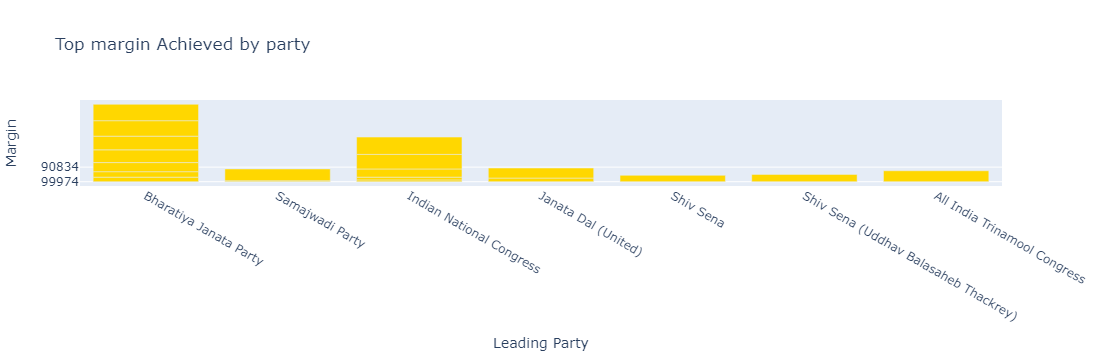

In [80]:
# need to check again.
# Create the bar plot 
figs = px.bar(top_20,x='Leading Party', y='Margin', title='Top margin Achieved by party',color_discrete_sequence=['gold', 'silver', 'brown'])
py.init_notebook_mode(connected=True)
figs.show()

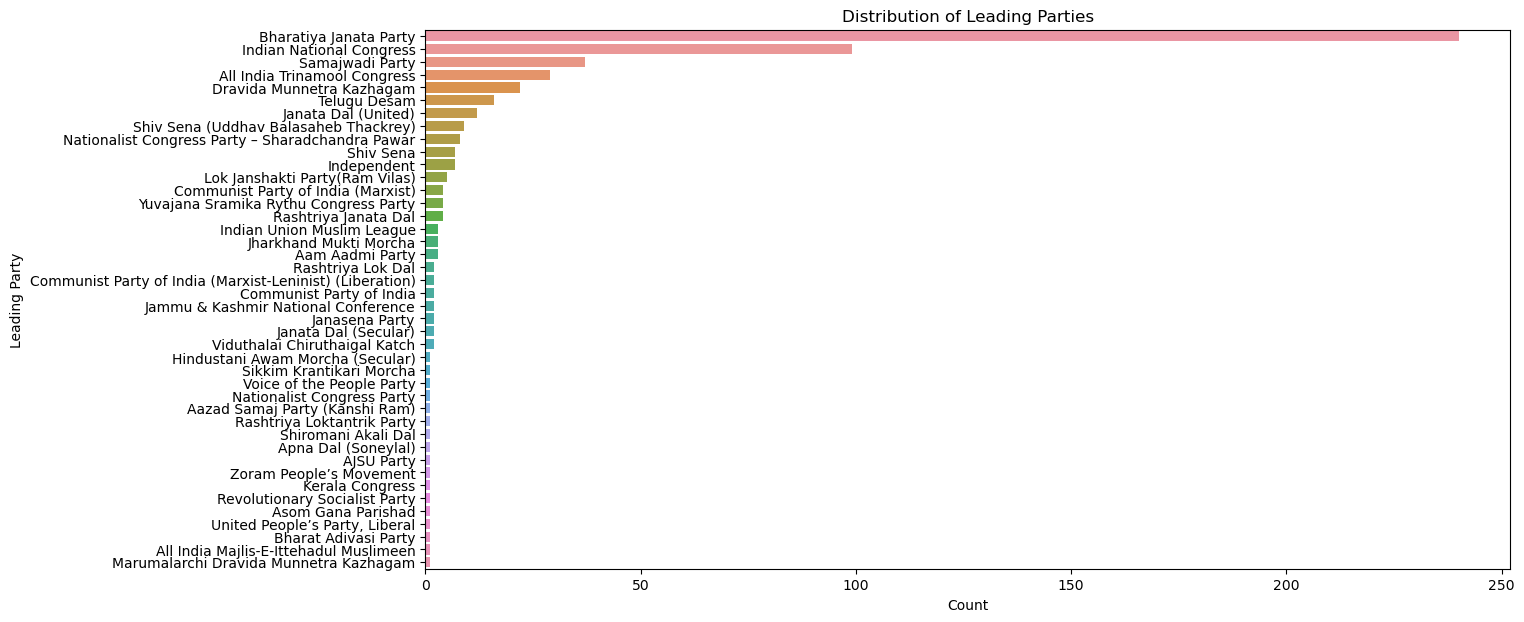

In [60]:
# Leading parties
plt.figure(figsize=(14, 7))
sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index)
plt.title('Distdf1bution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

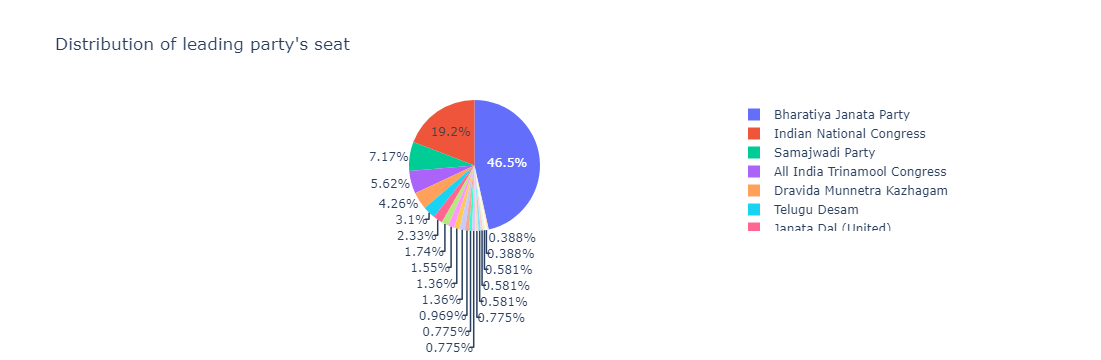

In [82]:
# for visualization of leading Party seat holdings percentage.
leads = df['Leading Party'].value_counts().head(20)
fig = px.pie(leads, names=leads.index, values=leads.values,title="Distdf1bution of leading Party's seat")
py.init_notebook_mode(connected=True)
fig.show()

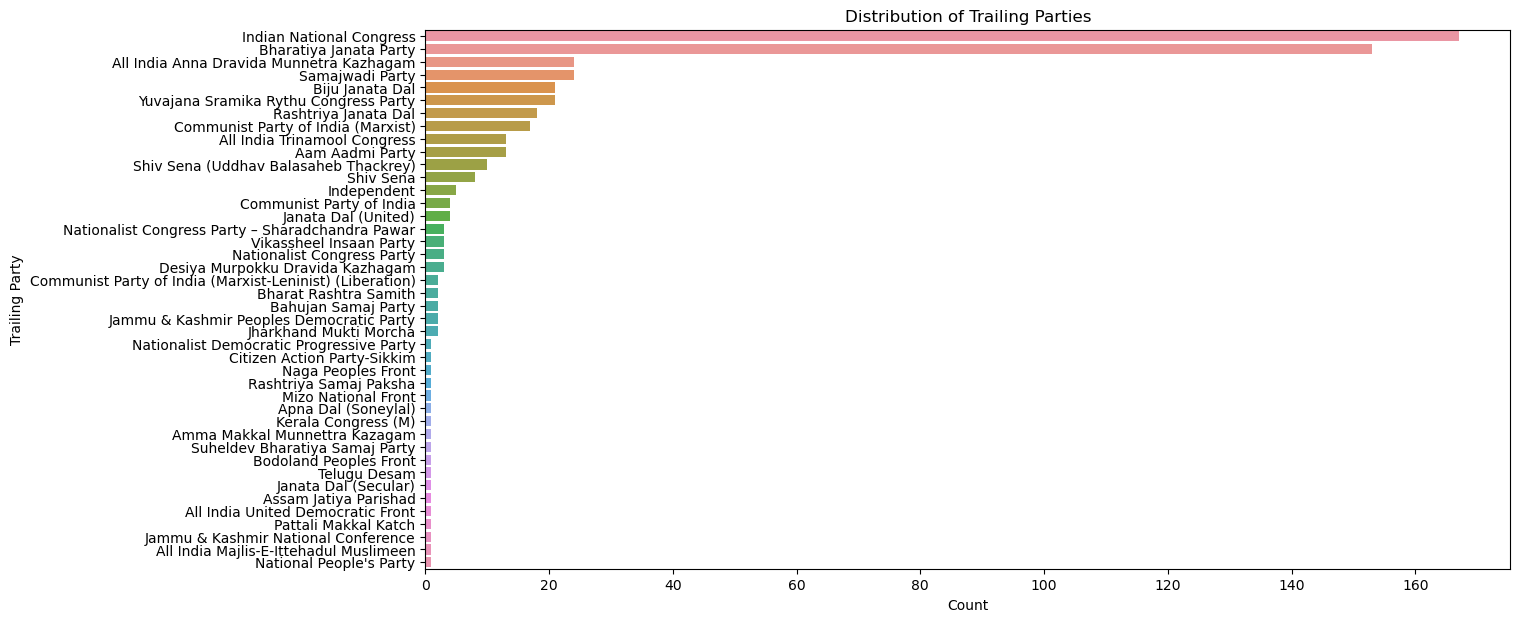

In [62]:
# Trailing parties
plt.figure(figsize=(14, 7))
sns.countplot(y='Trailing Party', data=df, order=df['Trailing Party'].value_counts().index)
plt.title('Distdf1bution of Trailing Parties')
plt.xlabel('Count')
plt.ylabel('Trailing Party')
plt.show()

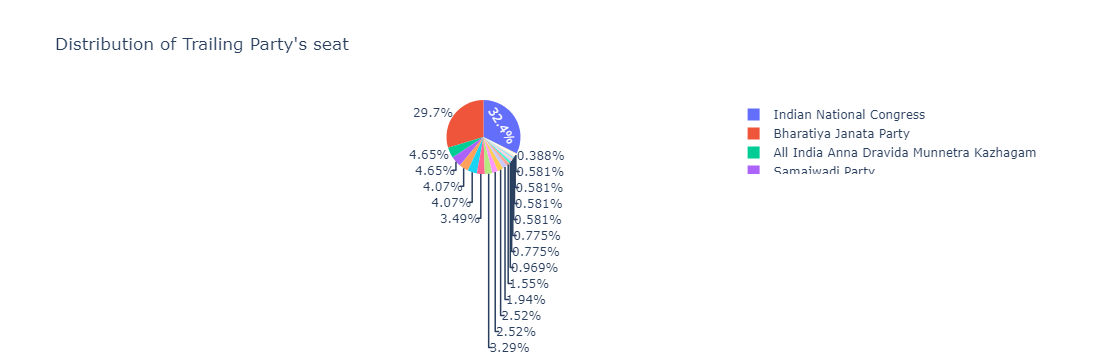

In [88]:
# for visualization of Trailing Party seat holdings percentage.
leads = df['Trailing Party'].value_counts().head(20)
fig = px.pie(leads, names=leads.index, values=leads.values, title="Distdf1bution of Trailing Party's seat")
py.init_notebook_mode(connected=True)
fig.show()

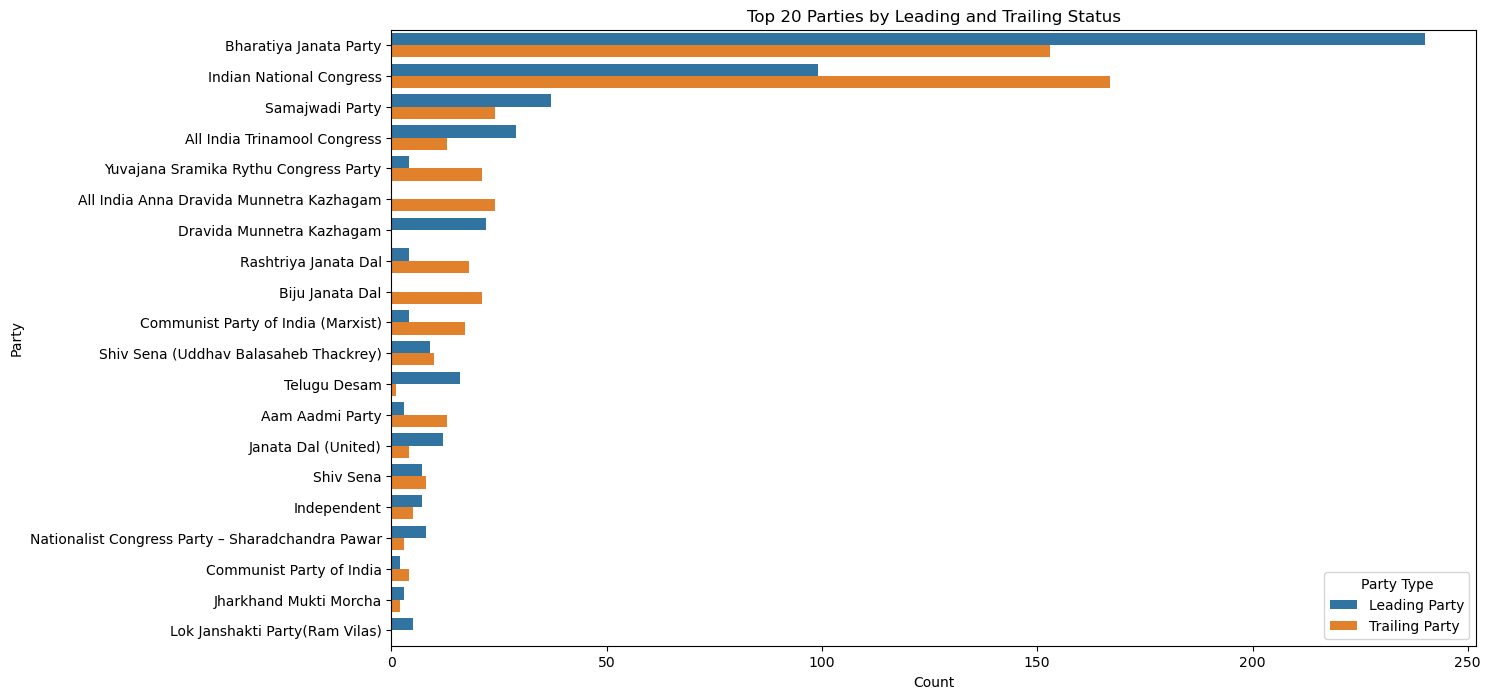

In [74]:
# Leading party vs Trailing party
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()

leading_vs_trailing_parties(df, n=20)

C:\Users\aravi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



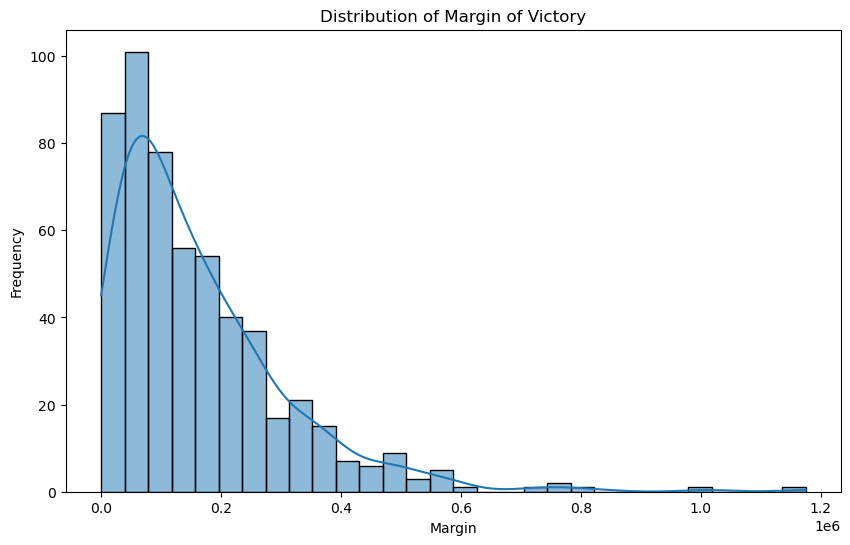

In [92]:
# Margin  -  need to check once again
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distdf1bution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

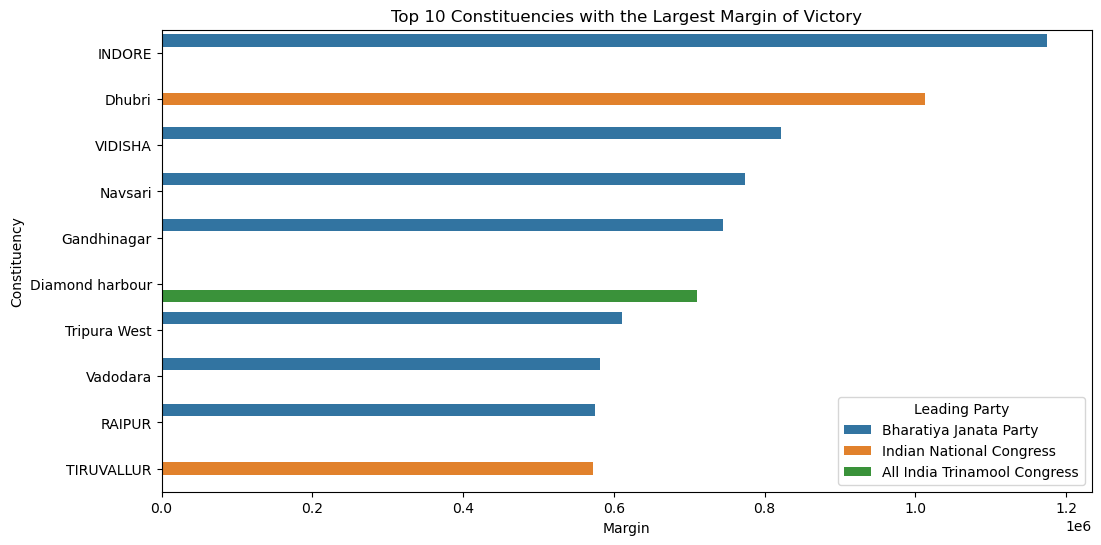

In [64]:
# Top N constituencies with the largest margin of victory
def plot_top_n_margins(df, n=10):

    df['Margin'] = df['Margin'].replace('-', '0')
    df['Margin'] = df['Margin'].str.replace(',', '').astype(int)
    
    top_n_margin = df.nlargest(n, 'Margin')
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Margin', y='Constituency', data=top_n_margin, hue='Leading Party')
    plt.title(f'Top {n} Constituencies with the Largest Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Constituency')
    plt.legend(title='Leading Party')
    plt.show()

plot_top_n_margins(df, n=10)

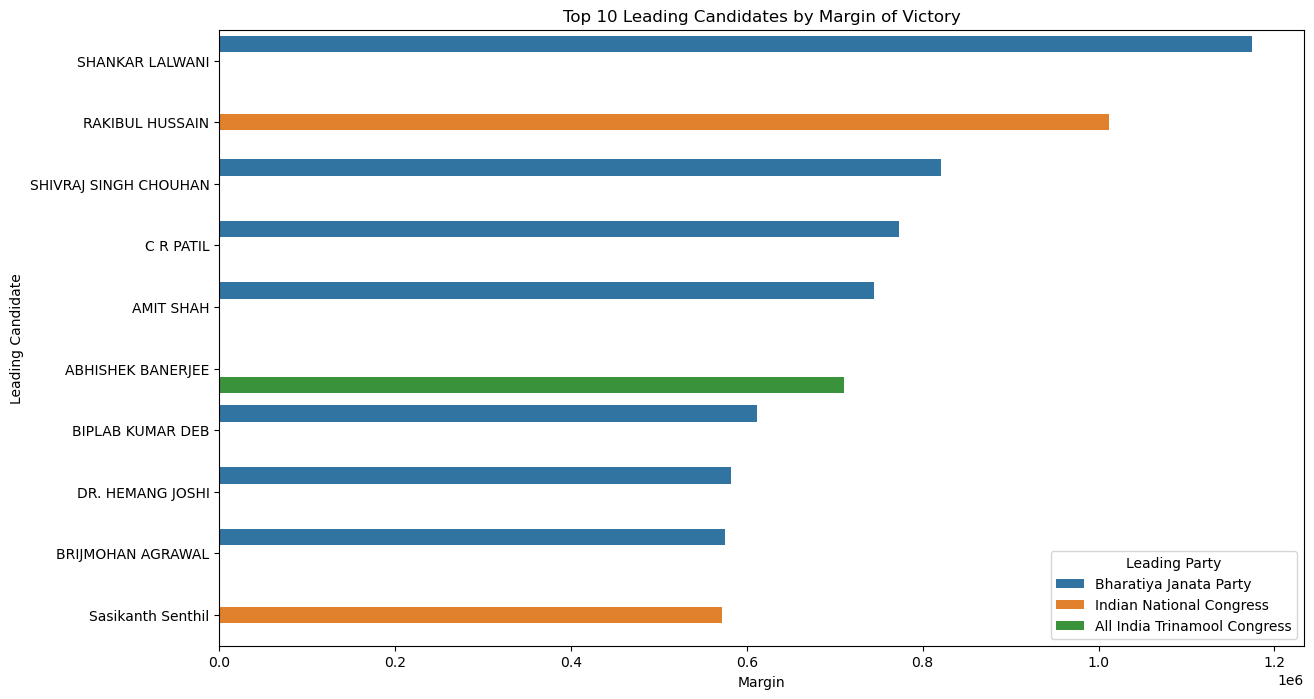

In [66]:
# Top N Candidates with the largest margin of victory
def top_n_leading_candidates(df, n=10):
    top_n_candidates = df.nlargest(n, 'Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(df, n=10)

In [ ]:
# 4. Analysis of the party results.

In [44]:
# Margin column is in object so changing into int.
df1["Margin"] = df1["Margin"].astype(int)

In [124]:
# Converts values in the column Margin to numeric. Invalid conversions result in NaN (due to errors='coerce').

# pd.to_numedf1c, errors=coerce
# df1['Margin'] = pd.to_numedf1c(df1['Margin'], errors='coerce')
pd.to_numedf1c(df1['Margin'], errors='coerce')

0      329991
1       48282
2       49036
3      281794
4      306559
        ...  
537     81648
538    364422
539    199013
540     94473
541     46188
Name: Margin, Length: 542, dtype: int32

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        542 non-null    object
 1   Const. No.          542 non-null    int64 
 2   Leading Candidate   542 non-null    object
 3   Leading Party       542 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              542 non-null    int32 
 7   location            542 non-null    object
dtypes: int32(1), int64(1), object(6)
memory usage: 31.9+ KB


In [118]:
df1

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,"AJMER, INDIA"
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,"ALWAR, INDIA"
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,"AMBALA, INDIA"
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,"ANANTNAG-RAJOURI, INDIA"
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,"ARAKKONAM, INDIA"
...,...,...,...,...,...,...,...,...
537,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,"Wardha, INDIA"
538,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,"Wayanad, INDIA"
539,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,"West Delhi, INDIA"
540,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,"Yavatmal- Washim, INDIA"


In [76]:
df['Leading Party'].unique()

array(['Bharatiya Janata Party', 'Indian National Congress',
       'Jammu & Kashmir National Conference', 'Dravida Munnetra Kazhagam',
       'Nationalist Congress Party – Sharadchandra Pawar',
       'Communist Party of India (Marxist)', 'Telugu Desam',
       'Samajwadi Party', 'Aam Aadmi Party',
       'Yuvajana Sramika Rythu Congress Party',
       'All India Trinamool Congress',
       'Communist Party of India (Marxist-Leninist) (Liberation)',
       'Shiv Sena', 'Rashtriya Janata Dal', 'Bharat Adivasi Party',
       'Independent', 'Rashtriya Lok Dal', 'Janata Dal (United)',
       'Asom Gana Parishad', 'Shiromani Akali Dal',
       'Viduthalai Chiruthaigal Katch', 'Jharkhand Mukti Morcha',
       'Hindustani Awam Morcha (Secular)', 'AJSU Party',
       'Lok Janshakti Party(Ram Vilas)',
       'Shiv Sena (Uddhav Balasaheb Thackrey)',
       'All India Majlis-E-Ittehadul Muslimeen', 'Janasena Party',
       'United People’s Party, Liberal', 'Janata Dal (Secular)',
       'Revolut

In [54]:
# Calculation of Status of Resultsabs: Pending and Declared Results
status_counts = df['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']
status_counts

,Status,Count
0,Result Declared,542
1,Uncontested,1


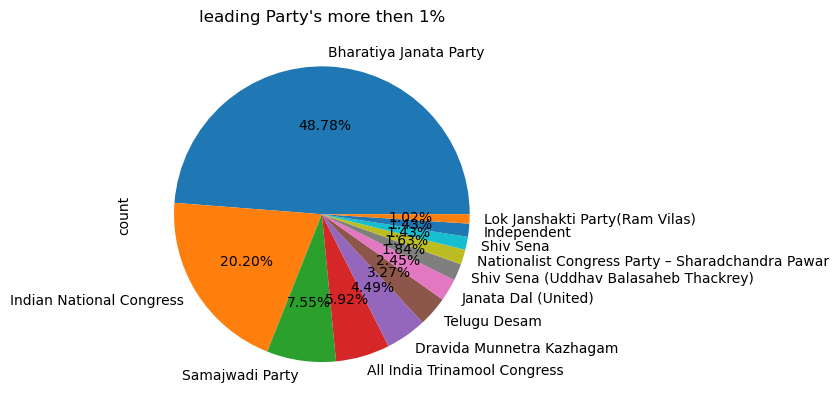

In [116]:
# Displayed more than 1% leading list.
top_15_parties = df1['Leading Party'].value_counts().nlargest(12)
fig = top_15_parties.plot(kind='pie', autopct='%0.2f%%', title="Leading Party's more than 1%")
plt.show()


In [98]:
# State-wise party distdf1bution
# df1['location'] = df1['Constituency'].apply(lambda x: f'{x}, India')
# df1      # or
df1['location'] = df1['Constituency']+", "+"INDIA"
df1.tail(15)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
527,Vadakara,3,SHAFI PARAMBIL,Indian National Congress,K K SHAILAJA TEACHER,Communist Party of India (Marxist),114506,"Vadakara, INDIA"
528,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,"Vadodara, INDIA"
529,Vaishali,16,VEENA DEVI,Lok Janshakti Party(Ram Vilas),VIJAY KUMAR SHUKLA,Rashtriya Janata Dal,89634,"Vaishali, INDIA"
530,Valmiki Nagar,1,SUNIL KUMAR,Janata Dal (United),DEEPAK YADAV,Rashtriya Janata Dal,98675,"Valmiki Nagar, INDIA"
531,Valsad,26,DHAVAL LAXMANBHAI PATEL,Bharatiya Janata Party,ANANTKUMAR HASMUKHBHAI PATEL,Indian National Congress,210704,"Valsad, INDIA"
532,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,"Varanasi, INDIA"
533,Vijayawada,12,KESINENI SIVANATH (CHINNI),Telugu Desam,KESINENI SRINIVAS (NANI),Yuvajana Sramika Rythu Congress Party,282085,"Vijayawada, INDIA"
534,Visakhapatnam,4,SRIBHARAT MATHUKUMILI,Telugu Desam,JHANSI LAKSHMI. BOTCHA.,Yuvajana Sramika Rythu Congress Party,504247,"Visakhapatnam, INDIA"
535,Vizianagaram,3,APPALANAIDU KALISETTI,Telugu Desam,BELLANA CHANDRASEKHAR,Yuvajana Sramika Rythu Congress Party,249351,"Vizianagaram, INDIA"
536,Warangal,15,KADIYAM KAVYA,Indian National Congress,AROORI RAMESH,Bharatiya Janata Party,220339,"Warangal, INDIA"


In [126]:
# 1st Constituency Party with the highest and lowest margin of victory
highest_margin = df1.loc[df1['Margin'].idxmax()]
highest_margin
lowest_margin = df1.loc[df1['Margin'].idxmin()]
lowest_margin

Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                   48
location                           Mumbai North West, INDIA
Name: 357, dtype: object

In [128]:
# Display both highest_margin & lowest_margin
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin['Leading Candidate'], lowest_margin['Leading Candidate']],
    'Party':     [highest_margin['Leading Party'],     lowest_margin['Leading Party']],
    'Margin':    [highest_margin['Margin'],            lowest_margin['Margin']]
})

data_to_plot

,Candidate,Party,Margin
0,SHANKAR LALWANI,Bharatiya Janata Party,1175092
1,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48


In [138]:
party_votes = df1.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
party_votes

Leading Party
Bharatiya Janata Party                                      46081536
Indian National Congress                                    13005922
Dravida Munnetra Kazhagam                                    5081582
All India Trinamool Congress                                 4910963
Telugu Desam                                                 3660927
Samajwadi Party                                              2869566
Janata Dal (United)                                          1386413
Shiv Sena (Uddhav Balasaheb Thackrey)                        1015430
Communist Party of India (Marxist)                            746237
Lok Janshakti Party(Ram Vilas)                                720603
Nationalist Congress Party – Sharadchandra Pawar              716571
Indian Union Muslim League                                    702660
Shiv Sena                                                     700373
Independent                                                   629302
Jammu & Kashmir Nati

In [140]:
trailing_party_votes = df1.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_votes

Trailing Party
Indian National Congress                                    35872203
Bharatiya Janata Party                                      18160854
All India Anna Dravida Munnetra Kazhagam                     5519091
Yuvajana Sramika Rythu Congress Party                        4926068
Communist Party of India (Marxist)                           2622123
Samajwadi Party                                              2365143
Biju Janata Dal                                              2236289
Rashtriya Janata Dal                                         1962693
Bahujan Samaj Party                                          1716321
Aam Aadmi Party                                              1277670
Shiv Sena (Uddhav Balasaheb Thackrey)                        1131265
All India United Democratic Front                            1012476
All India Trinamool Congress                                  949763
Bharat Rashtra Samith                                         817012
Shiv Sena          

In [144]:
# party_votes = df1.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
# party_votes

# trailing_party_votes = df1.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
# trailing_party_votes

# Total_votes_by_Trailing_Party_and_Leading_Party = "party_votes" + "trailing_party_votes"
# Total_votes_by_Trailing_Party_and_Leading_Party


# Get the total margin of votes for Leading and Trailing Parties
party_votes = df1.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_votes = df1.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)

# Function to add two outputs
def add_outputs(party_votes, trailing_party_votes):
    """
    Adds two outputs together.

    Args:
        party_votes: Margin sum for leading parties.
        trailing_party_votes: Margin sum for trailing parties.

    Returns:
        The sum of the two outputs.
    """
    return party_votes.add(trailing_party_votes, fill_value=0)  # Use `add` to align indexes and fill missing values with 0

# Example usage:
total_sum = add_outputs(party_votes, trailing_party_votes)

# Print the result
print(f"The total sum is: \n{total_sum}")


The total sum is: 
AJSU Party                                    80880.0
Aam Aadmi Party                             1505187.0
Aazad Samaj Party (Kanshi Ram)               151473.0
All India Anna Dravida Munnetra Kazhagam    5519091.0
All India Majlis-E-Ittehadul Muslimeen       472737.0
                                              ...    
Viduthalai Chiruthaigal Katch                174257.0
Vikassheel Insaan Party                      399636.0
Voice of the People Party                    371910.0
Yuvajana Sramika Rythu Congress Party       5129983.0
Zoram People’s Movement                       68288.0
Name: Margin, Length: 62, dtype: float64


In [146]:
trailing_party_seats = df1['Trailing Party'].value_counts()  # if u want top 20 use .head(20)
trailing_party_seats

Trailing Party
Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4
Nationalist Congress Part

In [148]:
leading_party_highest_votes = party_votes.idxmax()
# leading_party_highest_votes
leading_party_lowest_votes = party_votes.idxmin()
leading_party_lowest_votes

'Apna Dal (Soneylal)'

In [150]:
rahul_Constituency = df1[df1['Leading Candidate'] == 'RAHUL GANDHI']
rahul_Constituency
modi_Constituency = df1[df1['Leading Candidate'] == 'NARENDRA MODI']
modi_Constituency
amit_Constituency = df1[df1['Leading Candidate'] == 'AMIT SHAH']
amit_Constituency
# or


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,"Gandhinagar, INDIA"


In [152]:
Party_Icon = ['NARENDRA MODI', 'AMIT SHAH', 'RAHUL GANDHI']
df1_filtered = df1[df1['Leading Candidate'].isin(Party_Icon)] # use top 3 .head(3)
df1_filtered

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,"Gandhinagar, INDIA"
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030,"Rae Bareli, INDIA"
532,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,"Varanasi, INDIA"
538,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,"Wayanad, INDIA"


In [162]:
# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_entries = df1[df1['Leading Candidate'] == 'Rahul Gandhi']
modi_entries = df1[df1['Leading Candidate'] == 'Narendra Modi']
amit_entries = df1[df1['Leading Candidate'] == 'Amit Shah']

# Get the margin values, using 0 if no entries are found
rahul_votes = rahul_entries['Margin'].values[0] if not rahul_entries.empty else 0
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Display the results
print(f"Rahul Gandhi votes: {rahul_votes}")
print(f"Narendra Modi votes: {modi_votes}")
print(f"Amit Shah votes: {amit_votes}")


Rahul Gandhi votes: 0
Narendra Modi votes: 0
Amit Shah votes: 0


In [158]:
# Top Candidates by Vote Margin: Highest Winning Margins "nlarges"
highest_margins = df1.nlargest(10, 'Margin')[['Constituency', 'Leading Candidate', 'Margin', 'Leading Party']]
highest_margins

,Constituency,Leading Candidate,Margin,Leading Party
221,INDORE,SHANKAR LALWANI,1175092,Bharatiya Janata Party
157,Dhubri,RAKIBUL HUSSAIN,1012476,Indian National Congress
524,VIDISHA,SHIVRAJ SINGH CHOUHAN,821408,Bharatiya Janata Party
384,Navsari,C R PATIL,773551,Bharatiya Janata Party
186,Gandhinagar,AMIT SHAH,744716,Bharatiya Janata Party
159,Diamond harbour,ABHISHEK BANERJEE,710930,All India Trinamool Congress
512,Tripura West,BIPLAB KUMAR DEB,611578,Bharatiya Janata Party
528,Vadodara,DR. HEMANG JOSHI,582126,Bharatiya Janata Party
422,RAIPUR,BRIJMOHAN AGRAWAL,575285,Bharatiya Janata Party
502,TIRUVALLUR,Sasikanth Senthil,572155,Indian National Congress


In [155]:
# Sort by 'Margin and select the top 20 rows
top_20 = df1.sort_values(by='Margin',ascending=False).head(20)
top_20

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092,"INDORE, INDIA"
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476,"Dhubri, INDIA"
524,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,"VIDISHA, INDIA"
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551,"Navsari, INDIA"
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,"Gandhinagar, INDIA"
159,Diamond harbour,21,ABHISHEK BANERJEE,All India Trinamool Congress,ABHIJIT DAS (BOBBY),Bharatiya Janata Party,710930,"Diamond harbour, INDIA"
512,Tripura West,1,BIPLAB KUMAR DEB,Bharatiya Janata Party,ASISH KUMAR SAHA,Indian National Congress,611578,"Tripura West, INDIA"
528,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,"Vadodara, INDIA"
422,RAIPUR,8,BRIJMOHAN AGRAWAL,Bharatiya Janata Party,VIKAS UPADHYAY,Indian National Congress,575285,"RAIPUR, INDIA"
502,TIRUVALLUR,1,Sasikanth Senthil,Indian National Congress,"Balaganapathy, V. Pon",Bharatiya Janata Party,572155,"TIRUVALLUR, INDIA"


In [265]:
# Sort by 'Margin and select the Low 20 rows
low_20 = df1.sort_values(by='Margin',ascending=True).head(20)
low_20

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
357,Mumbai North West,27,RAVINDRA DATTARAM WAIKAR,Shiv Sena,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),48,"Mumbai North West, INDIA"
40,Attingal,19,ADV ADOOR PRAKASH,Indian National Congress,V JOY,Communist Party of India (Marxist),684,"Attingal, INDIA"
236,Jajpur,8,RABINDRA NARAYAN BEHERA,Bharatiya Janata Party,SARMISTHA SETHI,Biju Janata Dal,1587,"Jajpur, INDIA"
226,JAIPUR RURAL,6,RAO RAJENDRA SINGH,Bharatiya Janata Party,ANIL CHOPRA,Indian National Congress,1615,"JAIPUR RURAL, INDIA"
256,KANKER,11,BHOJRAJ NAG,Bharatiya Janata Party,BIRESH THAKUR,Indian National Congress,1884,"KANKER, INDIA"
125,Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504,"Chandigarh, INDIA"
207,Hamirpur,47,AJENDRA SINGH LODHI,Samajwadi Party,KUNWAR PUSHPENDRA SINGH CHANDEL,Bharatiya Janata Party,2629,"Hamirpur, INDIA"
312,Lakshadweep,1,MUHAMMED HAMDULLAH SAYEED,Indian National Congress,MOHAMMED FAIZAL PP,Nationalist Congress Party – Sharadchandra Pawar,2647,"Lakshadweep, INDIA"
175,Farrukhabad,40,MUKESH RAJPUT,Bharatiya Janata Party,DR. NAVAL KISHOR SHAKYA,Samajwadi Party,2678,"Farrukhabad, INDIA"
74,Bansgaon,67,KAMLESH PASWAN,Bharatiya Janata Party,SADAL PRASAD,Indian National Congress,3150,"Bansgaon, INDIA"


In [164]:
# Lowest Winning Margins  "nsmallest"
highest_margins = df1.nsmallest(10, 'Margin')[['Constituency', 'Leading Candidate', 'Margin', 'Leading Party']]
highest_margins

,Constituency,Leading Candidate,Margin,Leading Party
357,Mumbai North West,RAVINDRA DATTARAM WAIKAR,48,Shiv Sena
40,Attingal,ADV ADOOR PRAKASH,684,Indian National Congress
236,Jajpur,RABINDRA NARAYAN BEHERA,1587,Bharatiya Janata Party
226,JAIPUR RURAL,RAO RAJENDRA SINGH,1615,Bharatiya Janata Party
256,KANKER,BHOJRAJ NAG,1884,Bharatiya Janata Party
125,Chandigarh,MANISH TEWARI,2504,Indian National Congress
207,Hamirpur,AJENDRA SINGH LODHI,2629,Samajwadi Party
312,Lakshadweep,MUHAMMED HAMDULLAH SAYEED,2647,Indian National Congress
175,Farrukhabad,MUKESH RAJPUT,2678,Bharatiya Janata Party
74,Bansgaon,KAMLESH PASWAN,3150,Bharatiya Janata Party


In [166]:
# Compadf1son between Leading and Trailing Candidatesabs
trends = df1[['Leading Party', 'Leading Candidate', 'Margin', 'Trailing Candidate', 'Trailing Party']]
trends

,Leading Party,Leading Candidate,Margin,Trailing Candidate,Trailing Party
0,Bharatiya Janata Party,BHAGIRATH CHOUDHARY,329991,RAMCHANDRA CHOUDHARY,Indian National Congress
1,Bharatiya Janata Party,BHUPENDER YADAV,48282,LALIT YADAV,Indian National Congress
2,Indian National Congress,VARUN CHAUDHRY,49036,BANTO KATARIA,Bharatiya Janata Party
3,Jammu & Kashmir National Conference,MIAN ALTAF AHMAD,281794,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party
4,Dravida Munnetra Kazhagam,S JAGATHRATCHAKAN,306559,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam
...,...,...,...,...,...
537,Nationalist Congress Party – Sharadchandra Pawar,AMAR SHARADRAO KALE,81648,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party
538,Indian National Congress,RAHUL GANDHI,364422,ANNIE RAJA,Communist Party of India
539,Bharatiya Janata Party,KAMALJEET SEHRAWAT,199013,MAHABAL MISHRA,Aam Aadmi Party
540,Shiv Sena (Uddhav Balasaheb Thackrey),SANJAY UTTAMRAO DESHMUKH,94473,RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena


In [172]:
# Displayed more than 1% of leading parties & Number of seats won by each party.
# top_15_parties = df1['Leading Party'].value_counts().nlargest(12)
# top_15_parties
# fig = top_15_parties.plot(kind='pie', autopct='%0.2f%%', title="Leading Party's more than 1%")
# plt.show()

df1['Leading Party'].value_counts()
seats_won = df1['Leading Party'].value_counts()  #if want top 10.head(10)
seats_won
# .plot(kind='pie',autopct='%0.2f%%')

Leading Party
Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League

In [174]:
df1.sort_values('Const. No.').head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
125,Chandigarh,1,MANISH TEWARI,Indian National Congress,SANJAY TANDON,Bharatiya Janata Party,2504,"Chandigarh, INDIA"
478,Sikkim,1,INDRA HANG SUBBA,Sikkim Krantikari Morcha,BHARAT BASNETT,Citizen Action Party-Sikkim,80830,"Sikkim, INDIA"
473,Shillong,1,DR. RICKY ANDREW J. SYNGKON,Voice of the People Party,VINCENT H. PALA,Indian National Congress,371910,"Shillong, INDIA"
83,Bargarh,1,PRADEEP PUROHIT,Bharatiya Janata Party,PARINITA MISHRA,Biju Janata Dal,251667,"Bargarh, INDIA"
398,PUDUCHERRY,1,VE VAITHILINGAM,Indian National Congress,A NAMASSIVAYAM,Bharatiya Janata Party,136516,"PUDUCHERRY, INDIA"
268,Kachchh,1,CHAVDA VINOD LAKHAMSHI,Bharatiya Janata Party,NITESH PARBATBHAI LALAN (MATANG),Indian National Congress,268782,"Kachchh, INDIA"
459,Saharanpur,1,IMRAN MASOOD,Indian National Congress,RAGHAV LAKHANPAL,Bharatiya Janata Party,64542,"Saharanpur, INDIA"
437,Rajmahal,1,VIJAY KUMAR HANSDAK,Jharkhand Mukti Morcha,TALA MARANDI,Bharatiya Janata Party,178264,"Rajmahal, INDIA"
457,SURGUJA,1,CHINTAMANI MAHARAJ,Bharatiya Janata Party,SHASHI SINGH KORAM,Indian National Congress,64822,"SURGUJA, INDIA"
283,Kasaragod,1,RAJMOHAN UNNITHAN,Indian National Congress,M.V BALAKRISHNAN MASTER,Communist Party of India (Marxist),100649,"Kasaragod, INDIA"


In [176]:
df1[df1['Const. No.']==5]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
26,Anakapalle,5,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,"Anakapalle, INDIA"
56,BILASPUR,5,TOKHAN SAHU,Bharatiya Janata Party,DEVENDRA YADAV,Indian National Congress,164558,"BILASPUR, INDIA"
111,Buldhana,5,JADHAV PRATAPRAO GANPATRAO,Shiv Sena,NARENDRA DAGDU KHEDEKAR,Shiv Sena (Uddhav Balasaheb Thackrey),29479,"Buldhana, INDIA"
199,Gulbarga,5,RADHAKRISHNA,Indian National Congress,DR. UMESH G JADHAV,Bharatiya Janata Party,27205,"Gulbarga, INDIA"
202,Guwahati,5,BIJULI KALITA MEDHI,Bharatiya Janata Party,MIRA BORTHAKUR GOSWAMI,Indian National Congress,251090,"Guwahati, INDIA"
209,Haridwar,5,TRIVENDRA SINGH RAWAT,Bharatiya Janata Party,VIRENDRA RAWAT,Indian National Congress,164056,"Haridwar, INDIA"
218,Hoshiarpur,5,DR. RAJ KUMAR CHABBEWAL,Aam Aadmi Party,YAMINI GOMAR,Indian National Congress,44111,"Hoshiarpur, INDIA"
228,JAMMU,5,JUGAL KISHORE,Bharatiya Janata Party,RAMAN BHALLA,Indian National Congress,135498,"JAMMU, INDIA"
259,KARNAL,5,MANOHAR LAL,Bharatiya Janata Party,DIVYANSHU BUDHIRAJA,Indian National Congress,232577,"KARNAL, INDIA"
296,Kodarma,5,ANNPURNA DEVI,Bharatiya Janata Party,VINOD KUMAR SINGH,Communist Party of India (Marxist-Leninist) (L...,377014,"Kodarma, INDIA"


In [178]:
seats_won_by("Bharatiya Janata Party")

239

In [180]:
# Only BJP Won
df1[df1['Leading Party']=='Bharatiya Janata Party']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,"AJMER, INDIA"
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,"ALWAR, INDIA"
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,"Adilabad, INDIA"
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,"Agra, INDIA"
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,"Ahmedabad East, INDIA"
...,...,...,...,...,...,...,...,...
524,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,"VIDISHA, INDIA"
528,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,"Vadodara, INDIA"
531,Valsad,26,DHAVAL LAXMANBHAI PATEL,Bharatiya Janata Party,ANANTKUMAR HASMUKHBHAI PATEL,Indian National Congress,210704,"Valsad, INDIA"
532,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513,"Varanasi, INDIA"


In [182]:
seats_won_by("Indian National Congress")

99

In [184]:
# Only Congress Won
df1[df1['Leading Party']=='Indian National Congress']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,"AMBALA, INDIA"
13,Alappuzha,15,K. C VENUGOPAL,Indian National Congress,A. M ARIFF,Communist Party of India (Marxist),63513,"Alappuzha, INDIA"
17,Allahabad,52,UJJWAL RAMAN SINGH,Indian National Congress,NEERAJ TRIPATHI,Bharatiya Janata Party,58795,"Allahabad, INDIA"
21,Amethi,37,KISHORI LAL,Indian National Congress,SMRITI IRANI,Bharatiya Janata Party,167196,"Amethi, INDIA"
22,Amravati,7,BALWANT BASWANT WANKHADE,Indian National Congress,NAVNEET RAVI RANA,Bharatiya Janata Party,19731,"Amravati, INDIA"
...,...,...,...,...,...,...,...,...
526,VIRUDHUNAGAR,34,MANICKAM TAGORE B,Indian National Congress,VIJAYAPRABHAKARAN V,Desiya Murpokku Dravida Kazhagam,4379,"VIRUDHUNAGAR, INDIA"
527,Vadakara,3,SHAFI PARAMBIL,Indian National Congress,K K SHAILAJA TEACHER,Communist Party of India (Marxist),114506,"Vadakara, INDIA"
536,Warangal,15,KADIYAM KAVYA,Indian National Congress,AROORI RAMESH,Bharatiya Janata Party,220339,"Warangal, INDIA"
538,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,"Wayanad, INDIA"


In [186]:
# BJP Won Congress Lost
df1[(df1['Leading Party']=='Bharatiya Janata Party')&(df1['Trailing Party']=='Indian National Congress')]    #.shape

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,"AJMER, INDIA"
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,"ALWAR, INDIA"
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,"Adilabad, INDIA"
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,"Ahmedabad East, INDIA"
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,"Ahmedabad West, INDIA"
...,...,...,...,...,...,...,...,...
522,Uttara Kannada,12,VISHWESHWAR HEGDE KAGERI,Bharatiya Janata Party,DR. ANJALI NIMBALKAR,Indian National Congress,337428,"Uttara Kannada, INDIA"
524,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,"VIDISHA, INDIA"
528,Vadodara,20,DR. HEMANG JOSHI,Bharatiya Janata Party,PADHIYAR JASHPALSINH MAHENDRASINH (BAPU),Indian National Congress,582126,"Vadodara, INDIA"
531,Valsad,26,DHAVAL LAXMANBHAI PATEL,Bharatiya Janata Party,ANANTKUMAR HASMUKHBHAI PATEL,Indian National Congress,210704,"Valsad, INDIA"


In [188]:
# Congress Won BJP Lost
df1[(df1['Leading Party']=='Indian National Congress')&(df1['Trailing Party']=='Bharatiya Janata Party')]      #.shape

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,"AMBALA, INDIA"
17,Allahabad,52,UJJWAL RAMAN SINGH,Indian National Congress,NEERAJ TRIPATHI,Bharatiya Janata Party,58795,"Allahabad, INDIA"
21,Amethi,37,KISHORI LAL,Indian National Congress,SMRITI IRANI,Bharatiya Janata Party,167196,"Amethi, INDIA"
22,Amravati,7,BALWANT BASWANT WANKHADE,Indian National Congress,NAVNEET RAVI RANA,Bharatiya Janata Party,19731,"Amravati, INDIA"
50,BHARATPUR,9,SANJNA JATAV,Indian National Congress,RAMSWAROOP KOLI,Bharatiya Janata Party,51983,"BHARATPUR, INDIA"
...,...,...,...,...,...,...,...,...
502,TIRUVALLUR,1,Sasikanth Senthil,Indian National Congress,"Balaganapathy, V. Pon",Bharatiya Janata Party,572155,"TIRUVALLUR, INDIA"
504,TONK-SAWAI MADHOPUR,12,HARISH CHANDRA MEENA,Indian National Congress,SUKHBIR SINGH JAUNAPURIA,Bharatiya Janata Party,64949,"TONK-SAWAI MADHOPUR, INDIA"
509,Thiruvananthapuram,20,SHASHI THAROOR,Indian National Congress,RAJEEV CHANDRASEKHAR,Bharatiya Janata Party,16077,"Thiruvananthapuram, INDIA"
536,Warangal,15,KADIYAM KAVYA,Indian National Congress,AROORI RAMESH,Bharatiya Janata Party,220339,"Warangal, INDIA"


In [190]:
# Parties other than BJP and Congress as leading and trailing and vise-a-versa
df1[(df1['Leading Party']!="Bharatiya Janata Party")&(df1['Leading Party']!="Indian National Congress")]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,location
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,"ANANTNAG-RAJOURI, INDIA"
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,"ARAKKONAM, INDIA"
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,"ARANI, INDIA"
10,Ahmednagar,37,NILESH DNYANDEV LANKE,Nationalist Congress Party – Sharadchandra Pawar,DR. SUJAY RADHAKRISHNA VIKHEPATIL,Bharatiya Janata Party,28929,"Ahmednagar, INDIA"
14,Alathur,9,K.RADHAKRISHNAN,Communist Party of India (Marxist),RAMYA HARIDAS,Indian National Congress,20111,"Alathur, INDIA"
...,...,...,...,...,...,...,...,...
533,Vijayawada,12,KESINENI SIVANATH (CHINNI),Telugu Desam,KESINENI SRINIVAS (NANI),Yuvajana Sramika Rythu Congress Party,282085,"Vijayawada, INDIA"
534,Visakhapatnam,4,SRIBHARAT MATHUKUMILI,Telugu Desam,JHANSI LAKSHMI. BOTCHA.,Yuvajana Sramika Rythu Congress Party,504247,"Visakhapatnam, INDIA"
535,Vizianagaram,3,APPALANAIDU KALISETTI,Telugu Desam,BELLANA CHANDRASEKHAR,Yuvajana Sramika Rythu Congress Party,249351,"Vizianagaram, INDIA"
537,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,"Wardha, INDIA"


In [192]:
df1['Leading Party'].nunique()

42

In [194]:
df1['Trailing Party'].nunique()

42

In [136]:
def seats_won_by(party):
    seats_won=df1[df1['Leading Party']==party].shape[0]
    return seats_won

for i in df1['Leading Party'].unique():
    print(f"{seats_won_by(i)} seats won by {i.upper()}")

239 seats won by BHARATIYA JANATA PARTY
99 seats won by INDIAN NATIONAL CONGRESS
2 seats won by JAMMU & KASHMIR NATIONAL CONFERENCE
22 seats won by DRAVIDA MUNNETRA KAZHAGAM
8 seats won by NATIONALIST CONGRESS PARTY – SHARADCHANDRA PAWAR
4 seats won by COMMUNIST PARTY OF INDIA (MARXIST)
16 seats won by TELUGU DESAM
37 seats won by SAMAJWADI PARTY
3 seats won by AAM AADMI PARTY
4 seats won by YUVAJANA SRAMIKA RYTHU CONGRESS PARTY
29 seats won by ALL INDIA TRINAMOOL CONGRESS
2 seats won by COMMUNIST PARTY OF INDIA (MARXIST-LENINIST) (LIBERATION)
7 seats won by SHIV SENA
4 seats won by RASHTRIYA JANATA DAL
1 seats won by BHARAT ADIVASI PARTY
7 seats won by INDEPENDENT
2 seats won by RASHTRIYA LOK DAL
12 seats won by JANATA DAL (UNITED)
1 seats won by ASOM GANA PARISHAD
1 seats won by SHIROMANI AKALI DAL
2 seats won by VIDUTHALAI CHIRUTHAIGAL KATCH
3 seats won by JHARKHAND MUKTI MORCHA
1 seats won by HINDUSTANI AWAM MORCHA (SECULAR)
1 seats won by AJSU PARTY
5 seats won by LOK JANSHAKTI PA

In [198]:
def seats_lost_by(party):
    seats_won=df1[df1['Trailing Party']==party].shape[0]
    return seats_won

for i in df1['Leading Party'].unique():
    print(f"The seats lost by {i.upper()} are {seats_lost_by(i)}")

The seats lost by BHARATIYA JANATA PARTY are 153
The seats lost by INDIAN NATIONAL CONGRESS are 167
The seats lost by JAMMU & KASHMIR NATIONAL CONFERENCE are 1
The seats lost by DRAVIDA MUNNETRA KAZHAGAM are 0
The seats lost by NATIONALIST CONGRESS PARTY – SHARADCHANDRA PAWAR are 3
The seats lost by COMMUNIST PARTY OF INDIA (MARXIST) are 17
The seats lost by TELUGU DESAM are 1
The seats lost by SAMAJWADI PARTY are 24
The seats lost by AAM AADMI PARTY are 13
The seats lost by YUVAJANA SRAMIKA RYTHU CONGRESS PARTY are 21
The seats lost by ALL INDIA TRINAMOOL CONGRESS are 13
The seats lost by COMMUNIST PARTY OF INDIA (MARXIST-LENINIST) (LIBERATION) are 2
The seats lost by SHIV SENA are 8
The seats lost by RASHTRIYA JANATA DAL are 18
The seats lost by BHARAT ADIVASI PARTY are 0
The seats lost by INDEPENDENT are 5
The seats lost by RASHTRIYA LOK DAL are 0
The seats lost by JANATA DAL (UNITED) are 4
The seats lost by ASOM GANA PARISHAD are 0
The seats lost by SHIROMANI AKALI DAL are 0
The se

In [202]:
# Total seats contested:
for i in df1['Leading Party'].unique():
    print(f"The total seats contested by {i.upper()} are: {seats_won_by(i) + seats_lost_by(i)}")

The total seats contested by BHARATIYA JANATA PARTY are: 392
The total seats contested by INDIAN NATIONAL CONGRESS are: 266
The total seats contested by JAMMU & KASHMIR NATIONAL CONFERENCE are: 3
The total seats contested by DRAVIDA MUNNETRA KAZHAGAM are: 22
The total seats contested by NATIONALIST CONGRESS PARTY – SHARADCHANDRA PAWAR are: 11
The total seats contested by COMMUNIST PARTY OF INDIA (MARXIST) are: 21
The total seats contested by TELUGU DESAM are: 17
The total seats contested by SAMAJWADI PARTY are: 61
The total seats contested by AAM AADMI PARTY are: 16
The total seats contested by YUVAJANA SRAMIKA RYTHU CONGRESS PARTY are: 25
The total seats contested by ALL INDIA TRINAMOOL CONGRESS are: 42
The total seats contested by COMMUNIST PARTY OF INDIA (MARXIST-LENINIST) (LIBERATION) are: 4
The total seats contested by SHIV SENA are: 15
The total seats contested by RASHTRIYA JANATA DAL are: 22
The total seats contested by BHARAT ADIVASI PARTY are: 1
The total seats contested by IN

In [204]:
# Win ratio concerning total contested seats:

for i in df1['Leading Party'].unique():
    print(f"The winning ratio of {i.upper()} is: {round(seats_won_by(i)/(seats_won_by(i) + seats_lost_by(i)),2)*100} %")

The winning ratio of BHARATIYA JANATA PARTY is: 61.0 %
The winning ratio of INDIAN NATIONAL CONGRESS is: 37.0 %
The winning ratio of JAMMU & KASHMIR NATIONAL CONFERENCE is: 67.0 %
The winning ratio of DRAVIDA MUNNETRA KAZHAGAM is: 100.0 %
The winning ratio of NATIONALIST CONGRESS PARTY – SHARADCHANDRA PAWAR is: 73.0 %
The winning ratio of COMMUNIST PARTY OF INDIA (MARXIST) is: 19.0 %
The winning ratio of TELUGU DESAM is: 94.0 %
The winning ratio of SAMAJWADI PARTY is: 61.0 %
The winning ratio of AAM AADMI PARTY is: 19.0 %
The winning ratio of YUVAJANA SRAMIKA RYTHU CONGRESS PARTY is: 16.0 %
The winning ratio of ALL INDIA TRINAMOOL CONGRESS is: 69.0 %
The winning ratio of COMMUNIST PARTY OF INDIA (MARXIST-LENINIST) (LIBERATION) is: 50.0 %
The winning ratio of SHIV SENA is: 47.0 %
The winning ratio of RASHTRIYA JANATA DAL is: 18.0 %
The winning ratio of BHARAT ADIVASI PARTY is: 100.0 %
The winning ratio of INDEPENDENT is: 57.99999999999999 %
The winning ratio of RASHTRIYA LOK DAL is: 100

In [ ]:
Conclusion
The above analysis provides insights into the constituencies with the highest and lowest winning margins in the 2024 Lok Sabha Elections.

In [ ]:
"If you find this notebook helpful...please Upvote,and give suggestions."
Thank you ♥